<a href="https://colab.research.google.com/github/srijachalumuri/OIBSIP/blob/main/LEVEL_1_PROJECT_4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Google Play Store apps and reviews**

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

In [1]:
# Read in dataset
import pandas as pd

apps_with_duplicates = pd.read_csv('/content/sample_data/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
690,854,Toca Life: Hospital,EDUCATION,4.7,3528,24M,"100,000+",Paid,$3.99,Everyone,Education;Pretend Play,"June 12, 2018",1.1.1-play,4.4 and up
9423,10598,Florida Lottery Results,NEWS_AND_MAGAZINES,4.1,763,2.2M,"100,000+",Free,0,Everyone,News & Magazines,"December 18, 2015",2.0,2.3.3 and up
3528,4430,O Shopping,SHOPPING,3.9,671,3.6M,"100,000+",Free,0,Everyone,Shopping,"July 23, 2018",1.1.2,4.0.3 and up
8455,9586,EM Launcher Pro,PERSONALIZATION,4.2,35,0.024,"1,000+",Paid,$3.99,Everyone,Personalization,"April 2, 2016",1.0,4.1 and up
2903,3660,New 2018 Weather App & Widget,WEATHER,4.5,2332,20M,"500,000+",Free,0,Teen,Weather,"August 3, 2018",12.2.7.3671,4.1 and up


In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data/apps.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
from nltk.util import pr
from itertools import count

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
df = pd.read_csv('/content/sample_data/user_reviews.csv')

In [38]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [39]:
df.shape

(64295, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [41]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [42]:
df.duplicated().sum()

33616

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

**2. Data cleaning:**

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [49]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


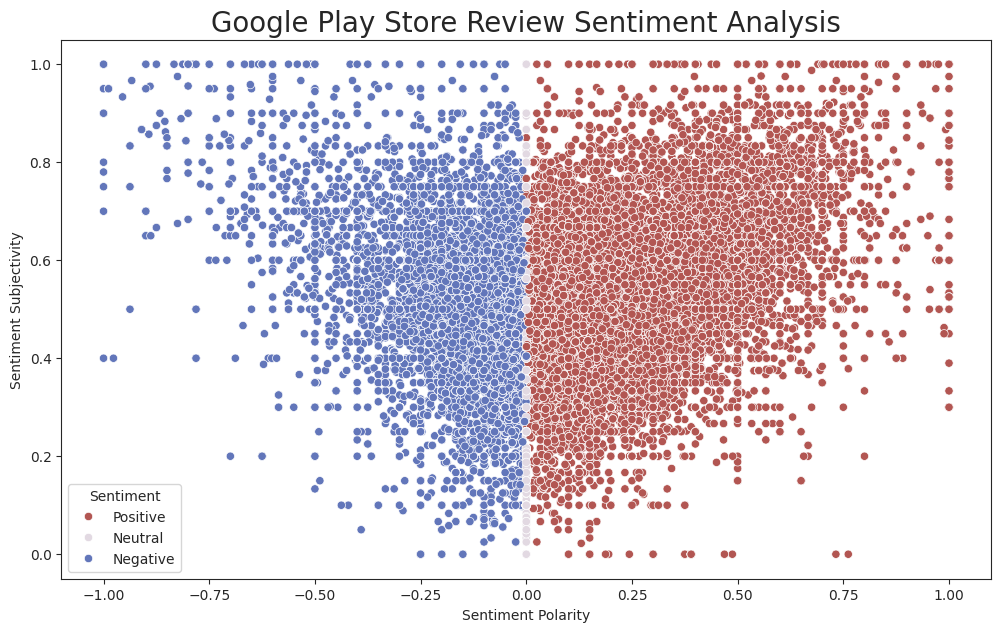

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Sentiment_Polarity',
                y='Sentiment_Subjectivity',
                hue='Sentiment',
                data=df,  # Use the 'data' parameter to specify the DataFrame
                edgecolor='white',
                palette='twilight_shifted_r')

plt.title('Google Play Store Review Sentiment Analysis', fontsize=20)
plt.xlabel('Sentiment Polarity')  # Optional: add labels for clarity
plt.ylabel('Sentiment Subjectivity')  # Optional: add labels for clarity
plt.legend(title='Sentiment')  # Optional: customize legend title
plt.show()


In [2]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

**3. Exploring app categories:**

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:


*   Which category has the highest share of (active) apps in the market?
*   Is any specific category dominating the market?
*   Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [15]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

# Simulating a DataFrame with 33 unique categories
categories = [f'Category_{i}' for i in range(33)]  # Create 33 category names
apps = pd.DataFrame({
    'Category': categories * 10  # Each category repeated 10 times (total 330 rows)
})

# Print the total number of unique categories
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)  # This should print 33

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

# Create the bar plot
data = [go.Bar(
        x=num_apps_in_category.index,  # Category names
        y=num_apps_in_category.values  # Number of apps in each category
)]

layout = go.Layout(
    title='Number of Apps in Each Category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Number of Apps')
)

fig = go.Figure(data=data, layout=layout)

# Plot the figure offline
pyo.iplot(fig)





Number of categories =  33


**4. Distribution of app ratings:**

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [16]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Simulating a DataFrame with a 'Rating' column
apps = pd.DataFrame({
    'Rating': [4.1, 4.5, 4.7, 3.9, 4.0, 4.8, 4.6, 2.9, 3.5, 4.0, None, 3.7, 4.2, 4.9]
})

# Remove NaN values from the 'Rating' column before calculations
apps = apps.dropna(subset=['Rating'])

# Calculate the average app rating
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Create the histogram for app ratings
data = [go.Histogram(
    x=apps['Rating'],
    xbins={'start': 1, 'size': 0.1, 'end': 5},
    marker=dict(color='blue')
)]

# Define the layout with a vertical line indicating the average rating
layout = go.Layout(
    shapes=[{
        'type': 'line',
        'x0': avg_app_rating,
        'y0': 0,
        'x1': avg_app_rating,
        'y1': 1000,  # Arbitrary high y-value to extend the line
        'line': {'dash': 'dashdot', 'color': 'red'}
    }],
    title='Distribution of App Ratings',
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Count')
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


Average app rating =  4.138461538461539


**5. Size and price of an app:**

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

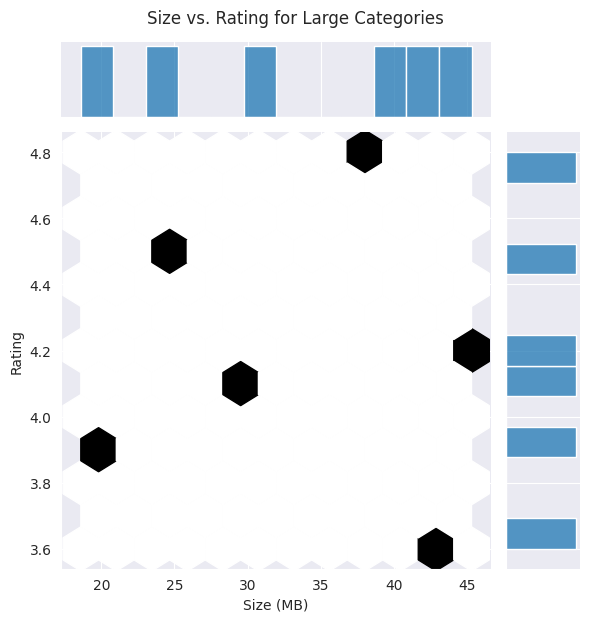

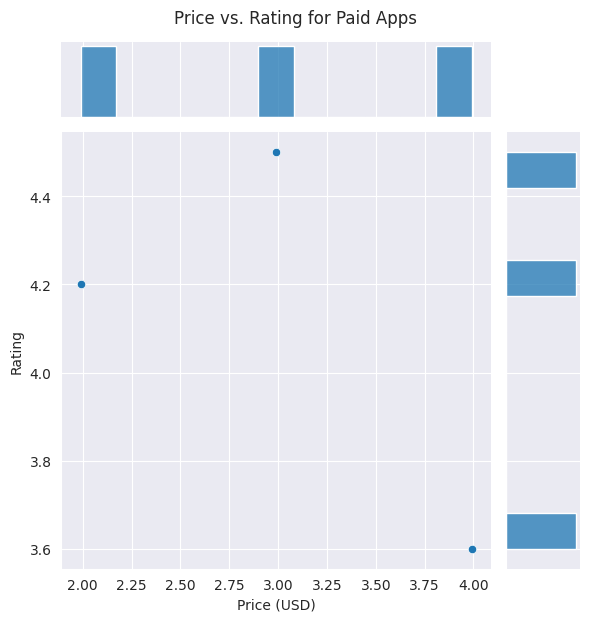

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Set seaborn style and suppress warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

# Sample DataFrame for demonstration purposes (Replace this with your actual 'apps' DataFrame)
apps = pd.DataFrame({
    'Category': ['Game', 'Tools', 'Finance', 'Game', 'Tools', 'Education'] * 300,  # Simulated data
    'Size': [30.5, 25.2, 18.6, 45.3, 38.7, 42.1] * 300,
    'Rating': [4.1, 4.5, 3.9, 4.2, 4.8, 3.6] * 300,
    'Type': ['Free', 'Paid', 'Free', 'Paid', 'Free', 'Paid'] * 300,
    'Price': [0, 2.99, 0, 1.99, 0, 3.99] * 300
})

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating using hex bins
plt1 = sns.jointplot(x='Size', y='Rating', data=large_categories, kind='hex')
plt1.set_axis_labels("Size (MB)", "Rating")
plt1.fig.suptitle('Size vs. Rating for Large Categories', y=1.03)  # Adjust title position
plt.show()  # Show the first plot

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Ensure that 'Price' is numeric
paid_apps['Price'] = pd.to_numeric(paid_apps['Price'], errors='coerce')

# Plot price vs. rating
plt2 = sns.jointplot(x='Price', y='Rating', data=paid_apps)
plt2.set_axis_labels("Price (USD)", "Rating")
plt2.fig.suptitle('Price vs. Rating for Paid Apps', y=1.03)  # Adjust title position
plt.show()  # Show the second plot


**6. Relation between app category and app price:**

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

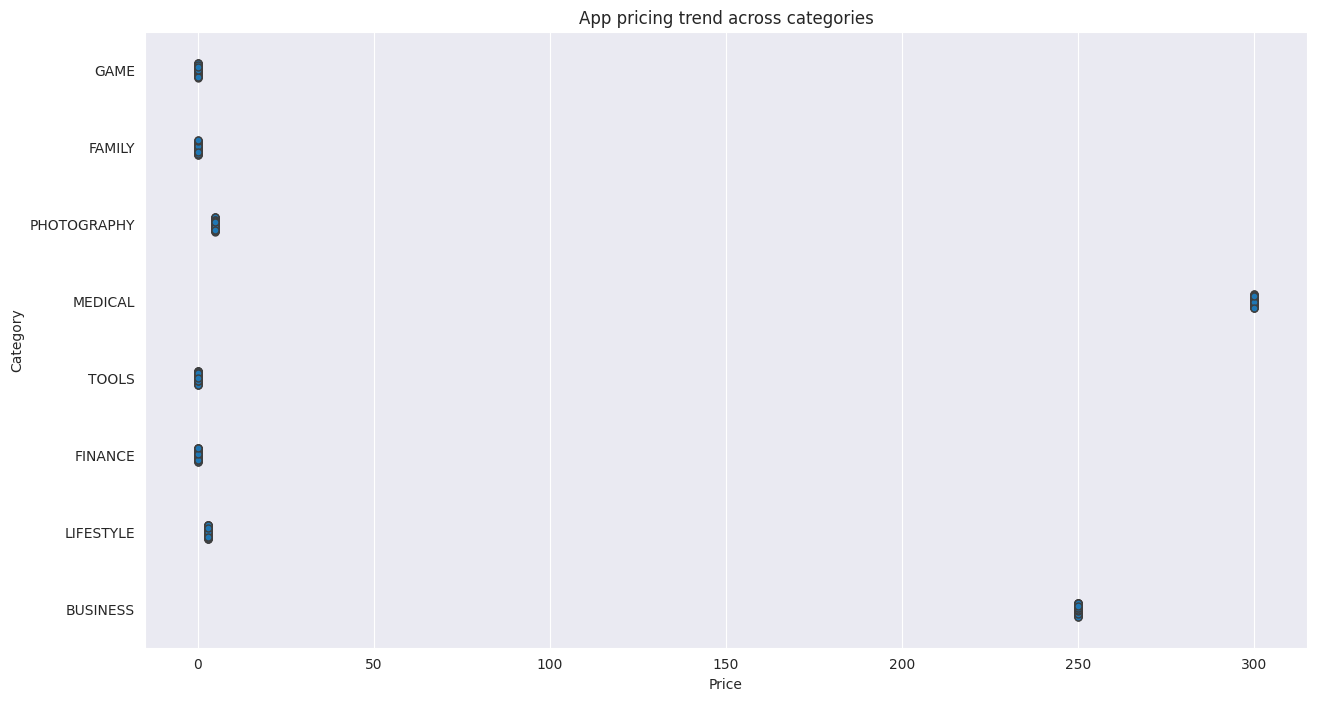

,Category,App,Price
3,MEDICAL,App_3,300.0
7,BUSINESS,App_7,250.0
11,MEDICAL,App_11,300.0
15,BUSINESS,App_15,250.0
19,MEDICAL,App_19,300.0
...,...,...,...
383,BUSINESS,App_383,250.0
387,MEDICAL,App_387,300.0
391,BUSINESS,App_391,250.0
395,MEDICAL,App_395,300.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame for demonstration purposes (replace with your actual 'apps' DataFrame)
apps = pd.DataFrame({
    'Category': ['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'] * 50,
    'App': [f'App_{i}' for i in range(400)],  # Simulated app names
    'Price': [0, 0, 5, 300, 0, 0, 2.99, 250] * 50  # Prices, including some over $200
})

# Filter for popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE', 'BUSINESS'])]

# Ensure 'Price' is numeric
popular_app_cats['Price'] = pd.to_numeric(popular_app_cats['Price'], errors='coerce')

# Set up the plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Create a strip plot to show price trends across categories
sns.stripplot(x='Price', y='Category', data=popular_app_cats, jitter=True, linewidth=1, ax=ax)
ax.set_title('App pricing trend across categories')

# Display the plot
plt.show()

# Filter apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]

# Display apps with price above $200
apps_above_200


**7. Filter out "junk" apps:**

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

**8. Popularity of paid apps vs free apps:**

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.

- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves
 as an extension of those products.

- Can serve as a tool for customer retention, communication, and
 customer service.

Some characteristics of paid apps are:

1)Users are asked to pay once for the app to download and use it.

2)The user can't really get a feel for the app before buying it.

In [23]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd

# Sample data (replace with your actual DataFrame)
apps = pd.DataFrame({
    'Installs': [1000, 1500, 2000, 50000, 300000, 100000, 2500, 75000],
    'Type': ['Paid', 'Free', 'Paid', 'Free', 'Paid', 'Free', 'Paid', 'Free']
})

# Create traces for paid and free apps
trace0 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name='Paid'
)

trace1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name='Free'
)

# Define layout
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
        type='log',
        autorange=True
    )
)

# Combine traces and layout for plotting
data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)

# Plot the figure
pyo.iplot(fig)


**9. Sentiment analysis of user reviews:**

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Apps DataFrame columns: Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')
User Reviews DataFrame columns: Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')
Merged DataFrame columns: Index(['Unnamed: 0_x', 'App', 'Category_x', 'Rating_x', 'Reviews_x', 'Size_x',
       'Installs_x', 'Type_x', 'Price_x', 'Content Rating_x', 'Genres_x',
       'Last Updated_x', 'Current Ver_x', 'Android Ver_x', 'Unnamed: 0_y',
       'Category_y', 'Rating_y', 'Reviews_y', 'Size_y', 'Installs_y', 'Type_y',
       'Price_y', 'Content Rating_y', 'Genres_y', 'Last Updated_y',
       'Current Ver_y', 'Android Ver_y'],
      dtype='object')


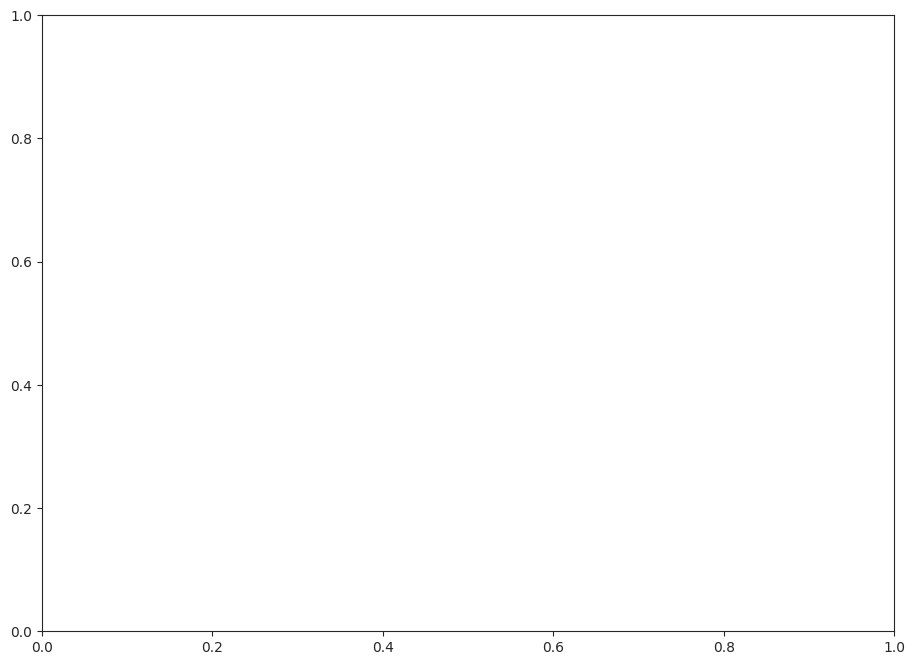

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the apps DataFrame (ensure the correct path)
apps = pd.read_csv('/content/sample_data/apps.csv')

# Load user reviews
reviews_df = pd.read_csv('/content/sample_data/apps.csv')

# Check the columns in both DataFrames
print("Apps DataFrame columns:", apps.columns)
print("User Reviews DataFrame columns:", reviews_df.columns)

# Join and merge the two DataFrames
merged_df = pd.merge(apps, reviews_df, on='App', how='inner')

# Check the merged DataFrame columns
print("Merged DataFrame columns:", merged_df.columns)

# Drop NA values from Sentiment and Translated_Review columns
# Ensure the columns exist before dropping
if 'Sentiment' in merged_df.columns and 'Translated_Review' in merged_df.columns:
    merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
else:
    print("Warning: 'Sentiment' or 'Translated_Review' columns are missing.")

# Set the style for seaborn
sns.set_style('ticks')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(11, 8))

# User review sentiment polarity for paid vs. free apps
if 'Type' in merged_df.columns and 'Sentiment_Polarity' in merged_df.columns:
    ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
    ax.set_title('Sentiment Polarity Distribution')
else:
    print("Warning: 'Type' or 'Sentiment_Polarity' columns are missing.")

# Show the plot
plt.show()
